# Project 1: SAT & ACT Analysis

  SAT(Scholastic Assessment Test) earlier called as (Scholastic Aptitude Test) is a standardized test administered by the College Board and is required to be taken by students seeking admission to undergraduate schools. SAT exam has been developed to evaluate the written, verbal and mathematical skills of the candidates.For each section, the minimum score is 200 and the maximum is 800. The total SAT score is an addition of the two and therefore ranges from 400 - 1600 **[SAT](https://www.princetonreview.com/college/sat-information)**.

  ACT (American College Testing) is another standardised test used for college admissions in the US. It is has four compulsory sections - English, Mathematics, Reading, and Science, as well as an optional Writing paper. Each paper is scored from 1 - 36, and the composite score is an average of the total score from the four sections **[ACT](https://www.princetonreview.com/college/act-information)**.
  
  Each state in U.S has its own policies and regulations. Some states have mandatory SAT test while some have ACT and some have neither.




## Problem Statement

In this project I will be studying the participation rates of SAT and ACT for 2017 and 2018 and will be analysing the underlying patterns inorder to suggest recommendations to improve participation rate for a state.

The data are collected from these sites. **[SAT_2017](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)**, **[ACT_2017](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)**, **[SAT_2018](https://reports.collegeboard.org/sat-suite-program-results/state-results)**, **[ACT_2018](http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf)**,

## Executive Summary
I will be analysing the participation rates of each of the states in U.S. Generally high participation rate in one test means low participation rate in the other.Therefore, in order to increase the participation rate in one state, we should refrain from adding efforts if the state already have mandatory testing at the first place.

There wasn't much differences in test scores between 2017 and 2018. Mandatory testing can also result in low test scores than voluntary tests by students.

Efforts to increase SAT participation rates should be done on California as it does not have any mandatory tests. Beign a highly populous country it also needs lot of manpower and efforts to increase the participation rate. Along with that the board can also implement few more readily available free resources to encourage students by SAT coach tools.



### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Read the csv files for sat and act 2017 datasets
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Display the first 10 rows for SAT dataset
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#Display the first 10 rows for ACT dataset
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


For the SAT table, the columns are as follows:

    * State is individual states around the U.S
    * Participation is Participation rate from each state
    * Evidence-Based Reading and Writing is score for Reading and Writing
    * Math is the score for Maths
    * Total is the sum of Evidence-Based Reading & Writing and Math
    
    
For the ACT table, the columns are as follows:

    * State is individual states around the U.S
    * Participation is Participation rate from each state
    * Math is the score for Maths
    * Reading is the score for Reading
    * Science is the score for Science
    * Composite is the average of Math, Reading and Science



#### 4a. Does the data look complete? 

In [5]:
# check for duplicates (whether each state is present only once)
print("No.of duplicates in SAT17: ", (sat_2017.State.value_counts().values == 1).all())
print("No.of duplicates in ACT17: ", (act_2017.State.value_counts().values == 1).all())
sat_2017.info()

No.of duplicates in SAT17:  True
No.of duplicates in ACT17:  True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


Answer: Yes. The dataset looks complete as all the rows are with non-null values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

- SAT Test Minimum: 400 

- SAT SubTest Minimum :200

- ACT Test/SubTest Minimum: 1




- SAT Test Maximum: 800

- SAT SubTest Maximum: 1600

- ACT Test/SubTest Maximum: 36




#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

SAT 2017 - Maryland 'Math' Score

ACT 2017 - Maryland 'Science' Score

Remove the 'x' in 20.2x from Wyoming's 'Composite' score

In [6]:
#create copies of dataframe
sat_2017_clean = sat_2017.copy()
act_2017_clean = act_2017.copy()

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
#code
sat_2017_clean.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [8]:
act_2017_clean.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

- Participation column in both SAT and ACT are of String types instead of numeric type.

- Composite column in ACT is of String type instead of Float type.

- 'National' row  in ACT dataset which is an average and needs to be removed.

- Composite row in Wyoming score is 20.2x and x need to be removed.

- Maryland SAT_2017 and ACT_2017 score has missing/incorrectly typed data.






#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
#Convert string to float datatype
sat_2017_clean['Participation']=sat_2017_clean['Participation'].str.replace('%','').astype(float)

In [10]:
sat_2017_clean.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [11]:
#Convert string to float datatype
act_2017_clean['Participation']=act_2017_clean['Participation'].str.replace('%','').astype(float)

In [12]:
act_2017_clean.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#Correct SAT_2017 Maryland's Math score 54-->524
sat_2017_clean.loc[sat_2017_clean['State'] == 'Maryland', 'Math'] = 524


In [14]:
#Correct ACT_2017 Maryland's Science score 2.3--> 23.2
act_2017_clean.loc[act_2017_clean['State'] == 'Maryland', 'Science'] = 23.2

In [15]:
#Correct Wyoming['Composite'] score from 20.2x--> 20.2 by removing x
act_2017_clean.loc[act_2017_clean['State'] == 'Wyoming','Composite'] = 20.2

In [16]:
#Preview the changes 
act_2017_clean.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [17]:
#Convert SAT and ACT Participation percentages into proportions
sat_2017_clean['Participation'] = sat_2017_clean['Participation']/100
act_2017_clean['Participation'] = act_2017_clean['Participation']/100

In [18]:
#Preview the changes
sat_2017_clean.head(),act_2017_clean.head()

(        State  Participation  Evidence-Based Reading and Writing  Math  Total
 0     Alabama           0.05                                 593   572   1165
 1      Alaska           0.38                                 547   533   1080
 2     Arizona           0.30                                 563   553   1116
 3    Arkansas           0.03                                 614   594   1208
 4  California           0.53                                 531   524   1055,
       State  Participation  English  Math  Reading  Science Composite
 0  National           0.60     20.3  20.7     21.4     21.0      21.0
 1   Alabama           1.00     18.9  18.4     19.7     19.4      19.2
 2    Alaska           0.65     18.7  19.8     20.4     19.9      19.8
 3   Arizona           0.62     18.6  19.8     20.1     19.8      19.7
 4  Arkansas           1.00     18.9  19.0     19.7     19.5      19.4)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [19]:
#Convert 'Composite' column in ACT_2017 from Object to Float type
act_2017_clean["Composite"] = act_2017_clean['Composite'].astype(float)
act_2017_clean.Composite.dtype

dtype('float64')

- Display the data types again to confirm they are correct.

In [20]:
#Check the datatypes
act_2017_clean.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
#Preview column names
sat_2017_clean.columns,act_2017_clean.columns


(Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
        'Total'],
       dtype='object'),
 Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
        'Composite'],
       dtype='object'))

In [22]:
#Convert column names to lowercase and rename so as to distinguish SAT from ACT scores
#Shorten SAT Evidence-Based Reading and Writing to ebrw

sat_2017_clean.columns = ['sat_2017_state', 'sat_2017_participation', 'sat_2017_ebrw', 'sat_2017_math', 'sat_2017_total']
act_2017_clean.columns = ['act_2017_state','act_2017_participation','act_2017_english','act_2017_math','act_2017_reading','act_2017_science','act_2017_composite']

In [23]:
#Preview datacolumns to check
sat_2017_clean.columns,act_2017_clean.columns

(Index(['sat_2017_state', 'sat_2017_participation', 'sat_2017_ebrw',
        'sat_2017_math', 'sat_2017_total'],
       dtype='object'),
 Index(['act_2017_state', 'act_2017_participation', 'act_2017_english',
        'act_2017_math', 'act_2017_reading', 'act_2017_science',
        'act_2017_composite'],
       dtype='object'))

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|:------:|----|-------|-----------|
|sat_2017_state|object|SAT|Name of the states of U.S|
|sat_2017_participation|float|SAT|Participation proportion of students in each state(ex: 0.5 represents 50% of students)|
|sat_2017_ebrw|int|SAT|Average(SAT subtest) score for Reading and Writing(with min. of 200 and max. of 800)|
|sat_2017_math|int|SAT|Average(SAT subtest) score for Math(with min. of 200 and max. of 800)|
|sat_2017_total|int|SAT|Average SAT Test score(with min. of 800 and max. of 1600)
|act_2017_state|object|ACT|Name of the states of U.S|
|act_2017_participation|float|ACT|Participation proportion of students in each state(ex: 0.5 represents 50% of students)|
|act_2017_english|float|ACT|Average(SAT subtest) score for English(with min. of 1 and max. of 36)|
|act_2017_math|float|ACT|Average(ACT subtest) score for Math(with min. of 1 and max. of 36)|
|act_2017_reading |float|ACT|Average(ACT subtest) score for Reading(with min. of 1 and max. of 36)|
|act_2017_science|float|ACT|Average(ACT subtest) score for Science(with min. of 1 and max. of 36)|
|act_2017_composite|float|ACT|Average ACT Test score(with min. of 1 and max. of 36)|






#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
#Drop 'National' row in ACT_2017 as it is the aggregate value of all states
act_2017_clean.drop(0,inplace = True)
#Reset the index 
act_2017_clean.reset_index(drop=True, inplace=True)

In [25]:
#Preview the dataset
act_2017_clean.head()

,act_2017_state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#Merge the sat_2017 and act_2017 dataset based on State column
combined_2017 = pd.merge(sat_2017_clean,act_2017_clean, left_on = 'sat_2017_state', right_on = 'act_2017_state', how = 'outer')

In [27]:
#Drop the redundant ACT state column
combined_2017.drop('act_2017_state',axis = 1,inplace=True)
#Rename the 'sat_2017_state' column to 'state'
combined_2017.rename(columns={'sat_2017_state' : 'state'},inplace = True)

In [28]:
#Preview the dataset
combined_2017.head(2)

,state,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
#Export the combined_2017 dataframe as combined_2017.csv
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
#Read SAT_2018 and ACT_2018 datasets
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [31]:
#Check the datatypes
sat_2018.dtypes, act_2018.dtypes

(State                                 object
 Participation                         object
 Evidence-Based Reading and Writing     int64
 Math                                   int64
 Total                                  int64
 dtype: object,
 State                             object
 Percentage of Students Tested      int64
 Average Composite Score          float64
 Average English Score            float64
 Average Math Score               float64
 Average Reading Score            float64
 Average Science Score            float64
 dtype: object)

In [32]:
#Create copies of dataframes
sat_2018_clean=sat_2018.copy()
act_2018_clean=act_2018.copy()

In [33]:
print("No.of duplicates in SAT18: ", (sat_2018.State.value_counts().values == 1).all())
print("No.of duplicates in ACT18: ", (act_2018.State.value_counts().values == 1).all())
sat_2018.info()
act_2018.info()

No.of duplicates in SAT18:  True
No.of duplicates in ACT18:  True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     

In [34]:
sat_2018_clean.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [35]:
#Fix incorrect datatypes
#Convert Participation(String) datatypes to float
sat_2018_clean['Participation']= sat_2018_clean['Participation'].str.replace('%','').astype(float)

In [36]:
#Check the changes of Participation datatype
sat_2018_clean.Participation.dtypes

dtype('float64')

In [37]:
#Convert Participation percentage to proportions
sat_2018_clean['Participation']= sat_2018_clean['Participation']/100
act_2018_clean['Percentage of Students Tested']= act_2018_clean['Percentage of Students Tested']/100

In [38]:
#Preview the changes
sat_2018_clean.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106


In [39]:
#Preview the changes
act_2018_clean.head(2)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7


#### Rename 2018 data columns

In [40]:
#Convert column names to lowercase and rename so as to distinguish SAT from ACT scores
#Shorten SAT Evidence-Based Reading and Writing to ebrw
sat_2018_clean.columns = ['sat_2018_state','sat_2018_participation','sat_2018_ebrw','sat_2018_math','sat_2018_total']
act_2018_clean.columns = ['act_2018_state','act_2018_participation','act_2018_composite','act_2018_english','act_2018_math','act_2018_reading','act_2018_science']

In [41]:
sat_2018_clean.columns, act_2018_clean.columns

(Index(['sat_2018_state', 'sat_2018_participation', 'sat_2018_ebrw',
        'sat_2018_math', 'sat_2018_total'],
       dtype='object'),
 Index(['act_2018_state', 'act_2018_participation', 'act_2018_composite',
        'act_2018_english', 'act_2018_math', 'act_2018_reading',
        'act_2018_science'],
       dtype='object'))

In [42]:
#Preview the changes
sat_2018.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106


In [43]:
# Preview the changes
act_2018_clean.head(2)

,act_2018_state,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7


#### Create a data dictionary for 2018 dataset

|Feature|Type|Dataset|Description|
|-------|----|-------|-----------|
|sat_2018_state|object|SAT|Name of the states of U.S|
|sat_2018_participation|float|SAT|Participation proportion of students in each state|
|sat_2018_ebrw|int|SAT|Average(SAT subtest) score for Reading and Writing|
|sat_2018_math|int|SAT|Average(SAT subtest) score for Math|
|sat_2018_total|int|SAT|Average SAT Test score|
|act_2018_state|object|ACT|Name of the states of U.S|
|act_2018_participation|float|ACT|Participation proportion of students in each state|
|act_2018_english|float|ACT|Average(ACT subtest) score for English|
|act_2018_math|float|ACT|Average(ACT subtest) score for Math|
|act_2018_reading|float|ACT|Average(ACT subtest) score for Reading|
|act_2018_science|float|ACT|Average(ACT subtest) score for Science|
|act_2018_composite|float|ACT|Average ACT Test score|






In [44]:
#Combine sat_2018 and act_2018 dataset based on State
combined_2018 = pd.merge(sat_2018_clean,act_2018_clean, left_on = 'sat_2018_state', right_on = 'act_2018_state', how = 'outer')


In [45]:
#Drop the redundant ACT state column
combined_2018.drop('act_2018_state',axis = 1,inplace=True)
#Rename the 'sat_2018_state' column to 'state'
combined_2018.rename(columns={'sat_2018_state' : 'state'},inplace = True)

In [46]:
#Preview the changes
combined_2018.head(2)

,state,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7


In [47]:
combined_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [48]:
#Merge the combined_2017 and combined_2018 csv's on 'state' column as final dataset
final = pd.merge(combined_2017,combined_2018, on='state')

In [49]:
#Export the final dataset to final.csv
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
#Transpose the describe method
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_ebrw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
#Create standard deviation function

def standard_deviation(series):
    sum_v = 0
    #for every value in the given series
    for x in series:
        #subtract mean value(sum(series)/len(series) from every data point and raise to power of 2)
        sum_v += ((x-sum(series)/len(series))**2)
        #Divide the sum value by total of length series minus 1 and take the squareroot
    return (sum_v/(len(series)-1))**0.5
   

In [52]:
standard_deviation(final.sat_2017_participation),np.std(final.sat_2017_participation)

(0.35276632270013036, 0.3492907076664507)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [53]:
#Using distionary comprehension to apply for numeric column
header = list(final.columns[1:])
body = [standard_deviation(final[x]) for x in header]

sd = {k:v for k,v in zip(header,body)}
sd

{'sat_2017_participation': 0.35276632270013036,
 'sat_2017_ebrw': 45.66690138768932,
 'sat_2017_math': 47.12139516560329,
 'sat_2017_total': 92.49481172519046,
 'act_2017_participation': 0.32140842015886834,
 'act_2017_english': 2.35367713980303,
 'act_2017_math': 1.9819894936505533,
 'act_2017_reading': 2.0672706264873146,
 'act_2017_science': 1.7393530462812443,
 'act_2017_composite': 2.020694891154341,
 'sat_2018_participation': 0.37314256330391965,
 'sat_2018_ebrw': 47.50262737831599,
 'sat_2018_math': 47.77262322095955,
 'sat_2018_total': 94.15508275097599,
 'act_2018_participation': 0.3408097623567245,
 'act_2018_composite': 2.1062781969951776,
 'act_2018_english': 2.4463562339793055,
 'act_2018_math': 2.035764538177723,
 'act_2018_reading': 2.1672445684804105,
 'act_2018_science': 1.8701137639716146}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
Yes. The manually calculated standard deviations matches with the output from pandas describe and numpy's std method only when n-1 is used.


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

Answer:
    There is change in participation rate of SAT's. Connecticut, Michigan and Delaware achieved 100% participation rate in both 2017 and 2018. Idaho and Colorado achieved 100% in 2018 while the District of Columbia only managed 100% in 2017.



    

In [54]:
# set state as index
final.set_index('state', inplace=True)

In [55]:
final.head()

,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
state,,,,,,,,,,,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [56]:
#Sorting dataframe by column 
#Print highest and lowest participation values for SAT_2017
print(final.sort_values(by ='sat_2017_participation', ascending = False)[['sat_2017_participation']].head(6))#Highest
print(final.sort_values(by ='sat_2017_participation', ascending = False)[['sat_2017_participation']].tail(5))#Lowest

                      sat_2017_participation
state                                       
District of Columbia                    1.00
Michigan                                1.00
Connecticut                             1.00
Delaware                                1.00
New Hampshire                           0.96
Maine                                   0.95
              sat_2017_participation
state                               
Arkansas                        0.03
Wyoming                         0.03
North Dakota                    0.02
Mississippi                     0.02
Iowa                            0.02


In [57]:
# #Print highest and lowest participation values for SAT_2018
print(final.sort_values(by ='sat_2018_participation', ascending = False)[['sat_2018_participation']].head(6))
print(final.sort_values(by ='sat_2018_participation', ascending = False)[['sat_2018_participation']].tail(5))

             sat_2018_participation
state                              
Colorado                       1.00
Connecticut                    1.00
Delaware                       1.00
Michigan                       1.00
Idaho                          1.00
Maine                          0.99
              sat_2018_participation
state                               
Mississippi                     0.03
Iowa                            0.03
Wisconsin                       0.03
Wyoming                         0.03
North Dakota                    0.02


In [58]:
#Print highest and lowest participation values for ACT_2017
print(final.sort_values(by ='act_2017_participation', ascending = False)[['act_2017_participation']].head(18))
print(final.sort_values(by ='act_2017_participation', ascending = False)[['act_2017_participation']].tail(5))

                act_2017_participation
state                                 
Alabama                           1.00
Kentucky                          1.00
Wisconsin                         1.00
Utah                              1.00
Tennessee                         1.00
South Carolina                    1.00
Oklahoma                          1.00
North Carolina                    1.00
Nevada                            1.00
Montana                           1.00
Mississippi                       1.00
Minnesota                         1.00
Louisiana                         1.00
Missouri                          1.00
Wyoming                           1.00
Colorado                          1.00
Arkansas                          1.00
North Dakota                      0.98
               act_2017_participation
state                                
Pennsylvania                     0.23
Rhode Island                     0.21
Delaware                         0.18
New Hampshire                 

In [59]:
#Print highest and lowest participation values for ACT_2018
print(final.sort_values(by ='act_2018_participation', ascending = False)[['act_2018_participation']].head(18))
print(final.sort_values(by ='act_2018_participation', ascending = False)[['act_2018_participation']].tail(5))

                act_2018_participation
state                                 
Alabama                           1.00
Kentucky                          1.00
Wisconsin                         1.00
Utah                              1.00
Tennessee                         1.00
South Carolina                    1.00
Oklahoma                          1.00
Ohio                              1.00
North Carolina                    1.00
Nevada                            1.00
Nebraska                          1.00
Montana                           1.00
Mississippi                       1.00
Louisiana                         1.00
Missouri                          1.00
Wyoming                           1.00
Arkansas                          1.00
Minnesota                         0.99
               act_2018_participation
state                                
Pennsylvania                     0.20
Delaware                         0.17
New Hampshire                    0.16
Rhode Island                  

In [60]:
#Masking to select subset of dataframe
#state with >50% participation on both tests in 2017
final[(final['sat_2017_participation'] > 0.5) & (final['act_2017_participation'] > 0.5 )] \
        [['sat_2017_participation','act_2017_participation']]

,sat_2017_participation,act_2017_participation
state,,
Florida,0.83,0.73
Georgia,0.61,0.55
Hawaii,0.55,0.90


In [61]:
#state with >50% participation on both tests in 2018
final[(final['sat_2018_participation'] > 0.5) & (final['act_2018_participation'] > 0.5)] \
    [['sat_2018_participation', 'act_2018_participation']]

,sat_2018_participation,act_2018_participation
state,,
Florida,0.56,0.66
Georgia,0.70,0.53
Hawaii,0.56,0.89
North Carolina,0.52,1.00
South Carolina,0.55,1.00


In [62]:
#state with >50% participation on both tests in 2017 and 2018
final[((final['sat_2017_participation'] > 0.5) & (final['act_2017_participation'] > 0.5)) & 
    ((final['sat_2018_participation'] > 0.5) & (final['act_2018_participation'] > 0.5))] \
    [['sat_2017_participation','act_2017_participation','sat_2018_participation','act_2018_participation']]

,sat_2017_participation,act_2017_participation,sat_2018_participation,act_2018_participation
state,,,,
Florida,0.83,0.73,0.56,0.66
Georgia,0.61,0.55,0.70,0.53
Hawaii,0.55,0.90,0.56,0.89


In [63]:
#States with >50% participation in both tests either year
final[((final['sat_2017_participation'] > 0.5) & (final['act_2017_participation'] > 0.5)) | 
    ((final['sat_2018_participation'] > 0.5) & (final['act_2018_participation'] > 0.5))] \
    [['sat_2017_participation','act_2017_participation','sat_2018_participation','act_2018_participation']]              

,sat_2017_participation,act_2017_participation,sat_2018_participation,act_2018_participation
state,,,,
Florida,0.83,0.73,0.56,0.66
Georgia,0.61,0.55,0.70,0.53
Hawaii,0.55,0.90,0.56,0.89
North Carolina,0.49,1.00,0.52,1.00
South Carolina,0.50,1.00,0.55,1.00


#### Highest and Lowest Participation rates


SAT_2017:

    Highest: District of Columbia, Michigan, Connecticut, Delaware
    Lowest: North Dakota, Mississippi, Iowa	
    
SAT_2018:

    Highest: Colorado, Connecticut, Delaware, Michigan, Idaho
    Lowest: North Dakota
    
ACT_2017:

    Highest: Alabama, Kentucky, Wisconsin,Utah, Tennessee,South Carolina, Oklahoma,North Carolina, Nevada, Montana, 	Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas
    Lowest: Maine
    
ACT_2018:

    Highest:Alabama,Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina,                 Nevada, Nebraska, Montana, Mississippi, Louisiana,Missouri,Wyoming,Arkansas 
    Lowest: Maine

In [64]:
#Number of states with 100% SAT participation in 2017
print((final['sat_2017_participation'] == 1).value_counts().sort_index(ascending = False).head(1))

#Number of states with 100% SATparticipation in 2018
print((final['sat_2018_participation'] == 1).value_counts().sort_index(ascending = False).head(1))

#States with 100% SAT participation rates in 2017 or 2018
final[(final['sat_2017_participation']==1) | (final['sat_2018_participation']==1)]\
      [['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']]

True    4
Name: sat_2017_participation, dtype: int64
True    5
Name: sat_2018_participation, dtype: int64


,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
state,,,,
Colorado,0.11,1.00,1.00,0.30
Connecticut,1.00,1.00,0.31,0.26
Delaware,1.00,1.00,0.18,0.17
District of Columbia,1.00,0.92,0.32,0.32
Idaho,0.93,1.00,0.38,0.36
Michigan,1.00,1.00,0.29,0.22


In [65]:
#Number of states with 100% ACT participation in 2017
print((final['act_2017_participation'] == 1).value_counts().sort_index(ascending = False).head(1))

#Number of states with 100% ACT participation in 2018
print((final['act_2018_participation'] == 1).value_counts().sort_index(ascending = False).head(1))

#States with 100% ACT participation rates in 2017 or 2018
final[(final['act_2017_participation']==1) | (final['act_2018_participation']==1)]\
      [['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']]

True    17
Name: act_2017_participation, dtype: int64
True    17
Name: act_2018_participation, dtype: int64


,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
state,,,,
Alabama,0.05,0.06,1.00,1.00
Arkansas,0.03,0.05,1.00,1.00
Colorado,0.11,1.00,1.00,0.30
Kentucky,0.04,0.04,1.00,1.00
Louisiana,0.04,0.04,1.00,1.00
Minnesota,0.03,0.04,1.00,0.99
Mississippi,0.02,0.03,1.00,1.00
Missouri,0.03,0.04,1.00,1.00
Montana,0.10,0.10,1.00,1.00


#### Highest and Lowest Composite scores

In [66]:
#Print highest and lowest composite scores for SAT and ACT_2017
print(final.sort_values(by = 'sat_2017_total',ascending= False)['sat_2017_total'].head(5))
print(final.sort_values(by = 'sat_2017_total',ascending= False)['sat_2017_total'].tail(5))
print(final.sort_values(by = 'act_2017_composite',ascending= False)['act_2017_composite'].head(5))
print(final.sort_values(by = 'act_2017_composite',ascending= False)['act_2017_composite'].tail(5))

state
Minnesota    1295
Wisconsin    1291
Iowa         1275
Missouri     1271
Kansas       1260
Name: sat_2017_total, dtype: int64
state
Maine                   1012
Idaho                   1005
Michigan                1005
Delaware                 996
District of Columbia     950
Name: sat_2017_total, dtype: int64
state
New Hampshire           25.5
Massachusetts           25.4
Connecticut             25.2
Maine                   24.3
District of Columbia    24.2
Name: act_2017_composite, dtype: float64
state
North Carolina    19.1
Hawaii            19.0
South Carolina    18.7
Mississippi       18.6
Nevada            17.8
Name: act_2017_composite, dtype: float64


In [67]:
#Print highest and lowest composite scores for SAT and ACT_2018
print(final.sort_values(by = 'sat_2018_total',ascending= False)['sat_2018_total'].head(5))
print(final.sort_values(by = 'sat_2018_total',ascending= False)['sat_2018_total'].tail(5))
print(final.sort_values(by = 'act_2018_composite',ascending= False)['act_2018_composite'].head(5))
print(final.sort_values(by = 'act_2018_composite',ascending= False)['act_2018_composite'].tail(5))

state
Minnesota       1298
Wisconsin       1294
North Dakota    1283
Iowa            1265
Kansas          1265
Name: sat_2018_total, dtype: int64
state
Hawaii                  1010
Idaho                   1001
West Virginia            999
Delaware                 998
District of Columbia     977
Name: sat_2018_total, dtype: int64
state
Connecticut      25.6
Massachusetts    25.5
New Hampshire    25.1
New York         24.5
Michigan         24.4
Name: act_2018_composite, dtype: float64
state
Alabama           19.1
Hawaii            18.9
Mississippi       18.6
South Carolina    18.3
Nevada            17.7
Name: act_2018_composite, dtype: float64


### Highest and Lowest Total/Composite scores
SAT_2017:

    Highest: Minnesota 
    Lowest: District of Columbia 
    
ACT_2017:

    Highest: New Hampshire
    Lowest: Nevada
    
SAT_2018:

    Highest: Minnesota
    Lowest: District of Columbia 
    
ACT_2018:

    Highest: Connecticut 
    Lowest: Nevada 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation Heatmap')

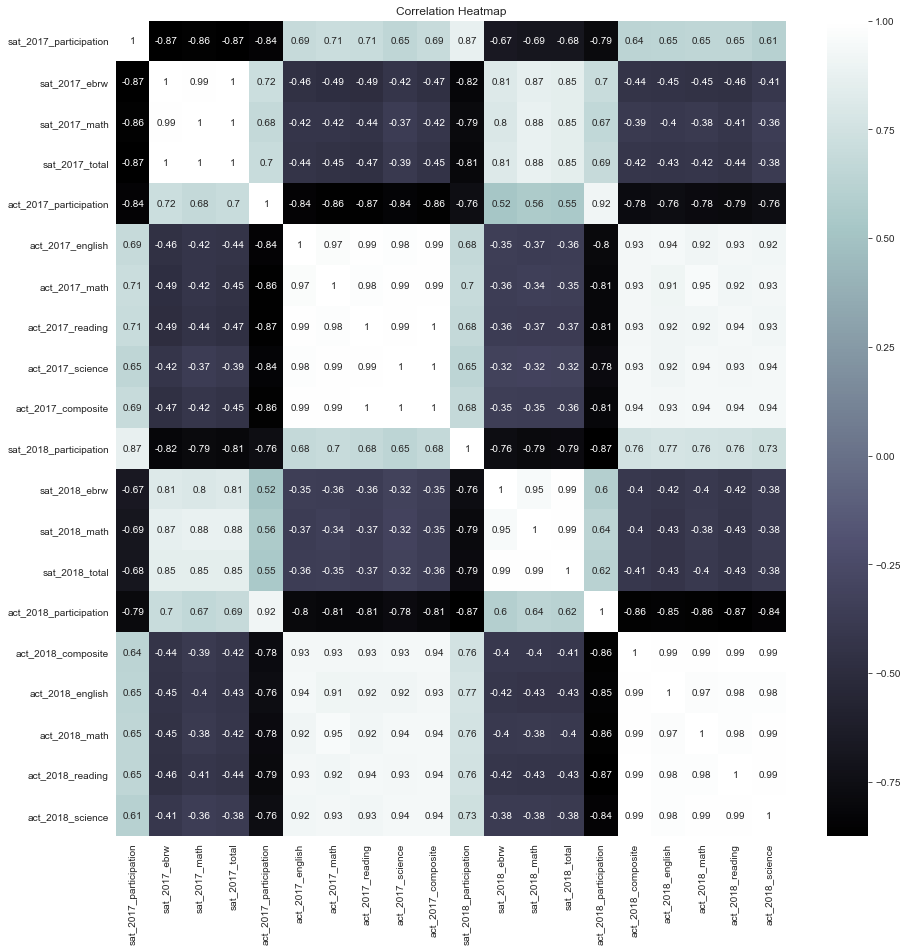

In [68]:
#Plot the heatmap 
plt.figure(figsize = (15, 15))
sns.heatmap(final.corr(),annot = True, cmap = 'bone')
plt.title("Correlation Heatmap")

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [69]:
#Create a function to plot histograms 
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(8,nrows+4),sharey =True ) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    

        
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 15) # set bin size to plot
        # Set titles, labels here for each subplot
        ax[i].axvline(dataframe[column].median(), c='red') #plot median line
        ax[i].axvline(dataframe[column].mean(), c='green') #plot mean line
        ax[i].set_title(list_of_titles[i],fontsize=12)
        ax[i].set_xlabel(list_of_xlabels[i],fontsize=12)
        ax[i].set_ylabel('Number of States',fontsize=15)
        plt.tight_layout()  



#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

#### SAT and ACT Participation Rates 


There seems to be two peaks for both SAT and ACT. SAT has lowest participation rates whereas ACT has highest participation rates in both 2017 and 2018. Therfore distribution is not normal.

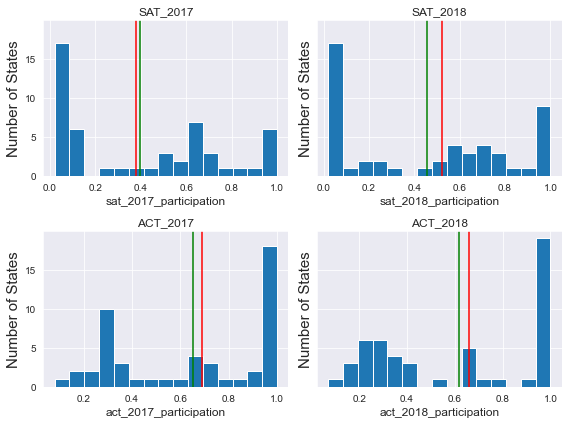

In [70]:
#Participation rates for SAT & ACT
list_of_columns = ['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']
list_of_titles = ['SAT_2017','SAT_2018', 'ACT_2017',  'ACT_2018']
list_of_xlabels = [i for i in list_of_columns]
subplot_histograms(final,list_of_columns, list_of_titles, list_of_xlabels)

#### SAT and ACT Math scores

The distribution of Math scores for SAT and ACT seems like bimodal distribution with 2 peaks.

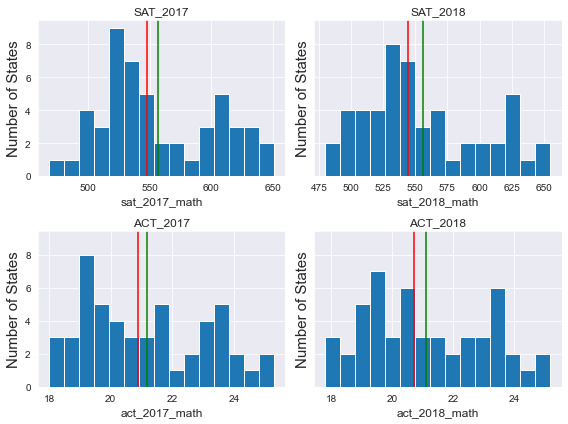

In [71]:
#Math scores for SAT & ACT
list_of_columns = ['sat_2017_math','sat_2018_math','act_2017_math','act_2018_math']
list_of_titles = ['SAT_2017', 'SAT_2018', 'ACT_2017',  'ACT_2018']
list_of_xlabels = [i for i in list_of_columns]
subplot_histograms(final,list_of_columns, list_of_titles, list_of_xlabels)

####  SAT and ACT Reading Scores

The distribution of SAT and ACT reading is also not normal with two peaks.

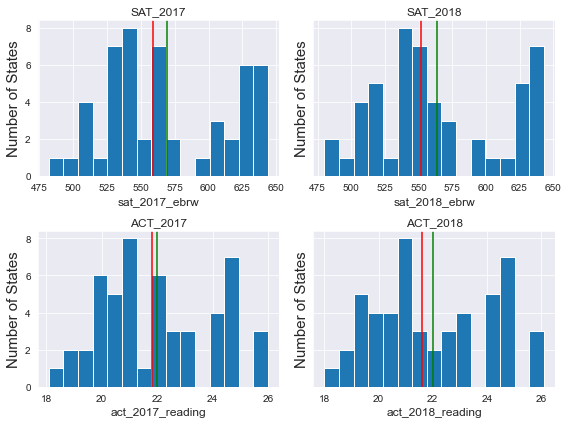

In [72]:
#Reading/verbal scores for SAT & ACT
list_of_columns = ['sat_2017_ebrw','sat_2018_ebrw','act_2017_reading','act_2018_reading']
list_of_titles = ['SAT_2017','SAT_2018', 'ACT_2017', 'ACT_2018']
list_of_xlabels = [i for i in list_of_columns]
subplot_histograms(final,list_of_columns, list_of_titles, list_of_xlabels)


#### SAT and ACT English/Science Scores

The distribution of English and Science score is also not normal distribution.

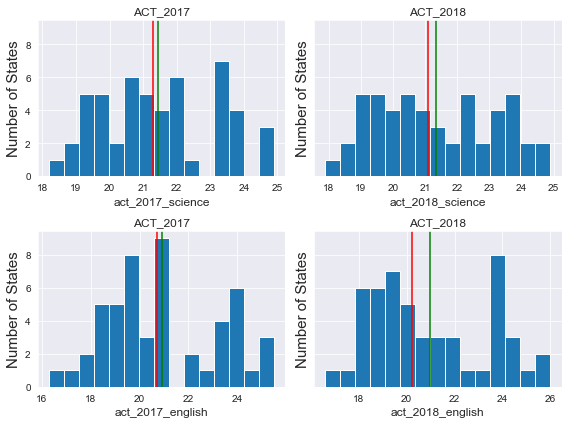

In [73]:
#Science and English scores for ACT
list_of_columns = ['act_2017_science','act_2018_science','act_2017_english','act_2018_english']
list_of_titles = ['ACT_2017','ACT_2018','ACT_2017','ACT_2018']
list_of_xlabels = [i for i in list_of_columns]
subplot_histograms(final,list_of_columns, list_of_titles, list_of_xlabels)

#### SAT and ACT Composite scores

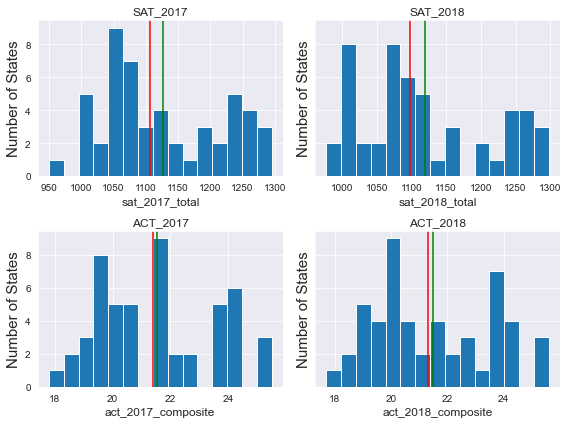

In [74]:
#Total/Composite scores for SAT & ACT
list_of_columns = ['sat_2017_total','sat_2018_total','act_2017_composite','act_2018_composite']
list_of_titles = ['SAT_2017','SAT_2018', 'ACT_2017', 'ACT_2018']
list_of_xlabels = [i for i in list_of_columns]
subplot_histograms(final,list_of_columns, list_of_titles, list_of_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


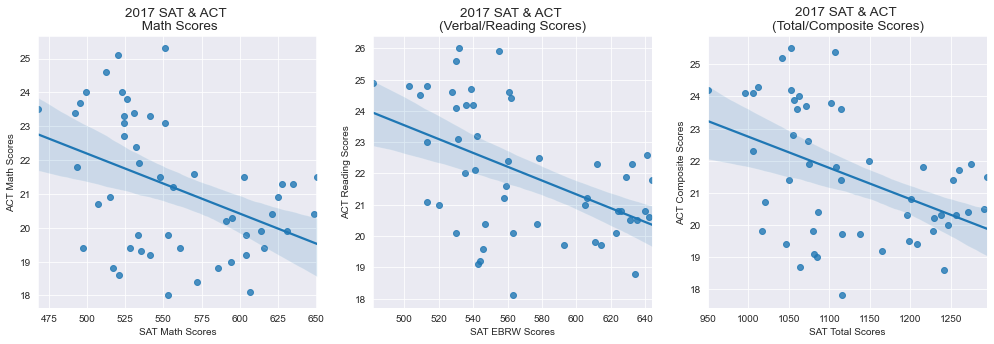

In [75]:
# Scatter plots for SAT vs. ACT math scores for 2017
fig = plt.figure(figsize=(17,5))

# add the Axes 1 object to the Figure (2017 Math)
ax1 = fig.add_subplot(1,3,1)
sns.regplot(data = final, x='sat_2017_math', y='act_2017_math')

# plot titles and labels
plt.xlabel('SAT Math Scores')
plt.ylabel('ACT Math Scores')
plt.title("2017 SAT & ACT \n Math Scores", fontsize=13.5)

# add the Axes 2 object to the Figure (2017 Reading/Verbal)
ax2 = fig.add_subplot(1,3,2)
sns.regplot(data =final, x='sat_2017_ebrw', y='act_2017_reading')
plt.title("ACT Composite Scores \n 2017-2018")

# plot titles and labels
plt.xlabel('SAT EBRW Scores')
plt.ylabel('ACT Reading Scores')
plt.title("2017 SAT & ACT \n(Verbal/Reading Scores)", fontsize=13.5);

# add the Axes 3 object to the Figure (2017 Total/Composite Scores)
ax3 = fig.add_subplot(1,3,3)
sns.regplot(data =final, x='sat_2017_total', y='act_2017_composite')
plt.title("ACT Composite Scores\n2017-2018")

# plot titles and labels
plt.xlabel('SAT Total Scores')
plt.ylabel('ACT Composite Scores')
plt.title("2017 SAT & ACT \n(Total/Composite Scores)", fontsize=13.5);

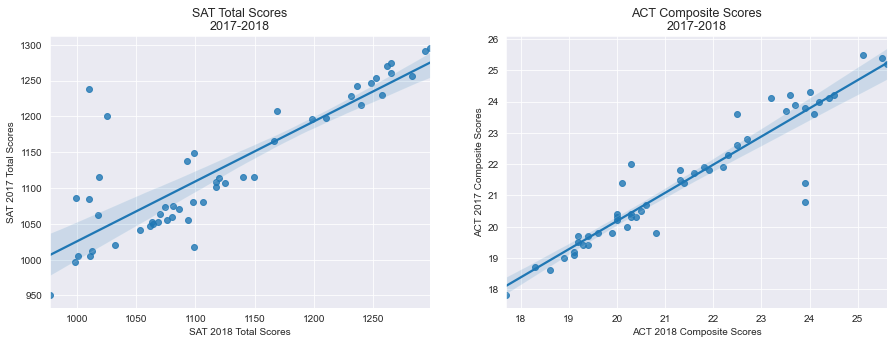

In [76]:
# Plot SAT & ACT Total/Composite scores
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure (SAT)
ax1 = fig.add_subplot(1,2,1)
sns.regplot(data=final, x='sat_2018_total', y='sat_2017_total')

# plot titles and labels
plt.xlabel('SAT 2018 Total Scores')
plt.ylabel('SAT 2017 Total Scores')
plt.title("SAT Total Scores\n2017-2018", fontsize=12.5)

# add the Axes 2 object to the Figure (ACT)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(data=final, x='act_2018_composite', y='act_2017_composite')
plt.title("ACT Composite Scores\n2017-2018")

# plot titles and labels
plt.xlabel('ACT 2018 Composite Scores')
plt.ylabel('ACT 2017 Composite Scores')
plt.title("ACT Composite Scores\n2017-2018", fontsize=12.5);

Text(0, 0.5, 'SAT Total Score 2017')

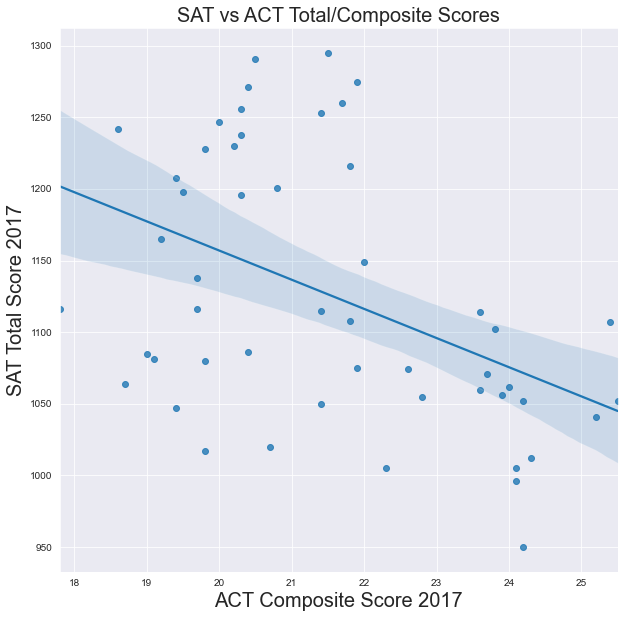

In [77]:
#Plot SAT Total score Vs ACT composite scores
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_2017_total', x='act_2017_composite', data=final[['sat_2017_total','act_2017_composite']])
ax.set_title('SAT vs ACT Total/Composite Scores',fontsize=20)
ax.set_xlabel('ACT Composite Score 2017',fontsize=20)
ax.set_ylabel('SAT Total Score 2017',fontsize=20)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

<AxesSubplot:title={'center':'SAT SubTest Scores'}, ylabel='Score'>

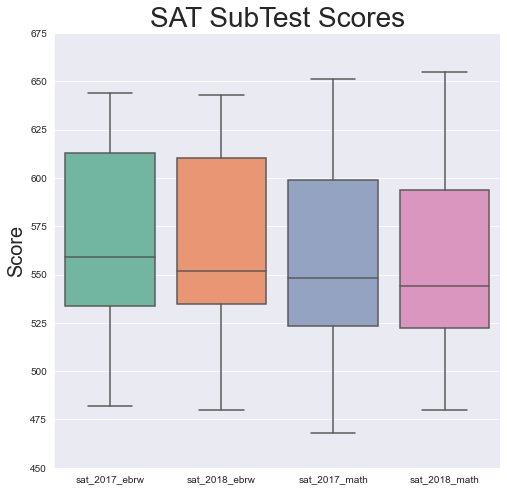

In [78]:
#Box Plot for SAT SubTest Scores
ax = plt.subplots(figsize=(8,8))
plt.title('SAT SubTest Scores',fontsize=28)
plt.ylabel('Score',fontsize=20)
plt.ylim(450, 675)
sns.boxplot(data=final[['sat_2017_ebrw','sat_2018_ebrw','sat_2017_math','sat_2018_math']],width=0.8, palette="Set2")

<AxesSubplot:title={'center':'ACT Scores'}, ylabel='Score'>

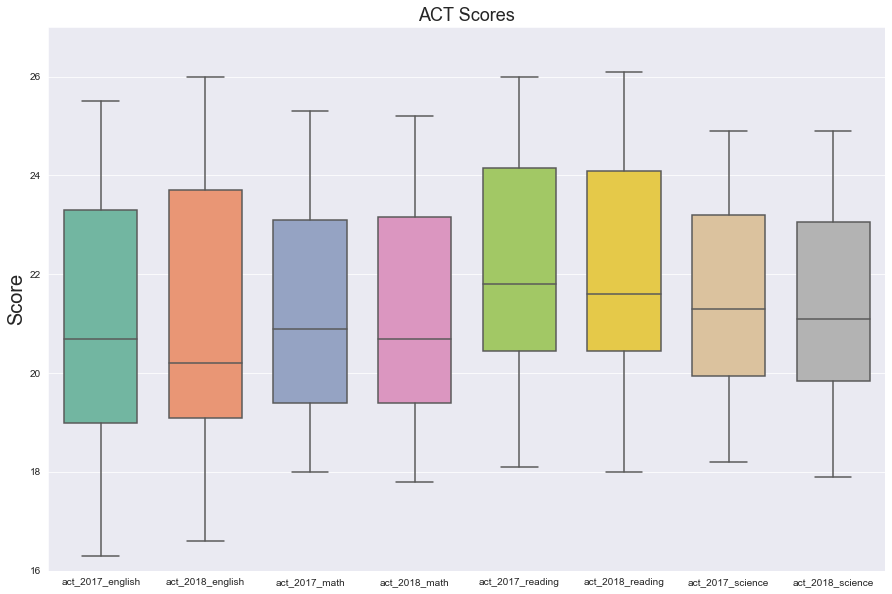

In [79]:
#Boxplot for ACT scores
ax = plt.subplots(figsize=(15,10))
plt.title('ACT Scores',fontsize=18)
plt.ylabel('Score',fontsize=20)
plt.ylim(16, 27)

sns.boxplot(data=final[['act_2017_english','act_2018_english','act_2017_math','act_2018_math','act_2017_reading','act_2018_reading','act_2017_science','act_2018_science']],width=0.7, palette="Set2")




<AxesSubplot:title={'center':'Tests Participation'}, ylabel='Participation'>

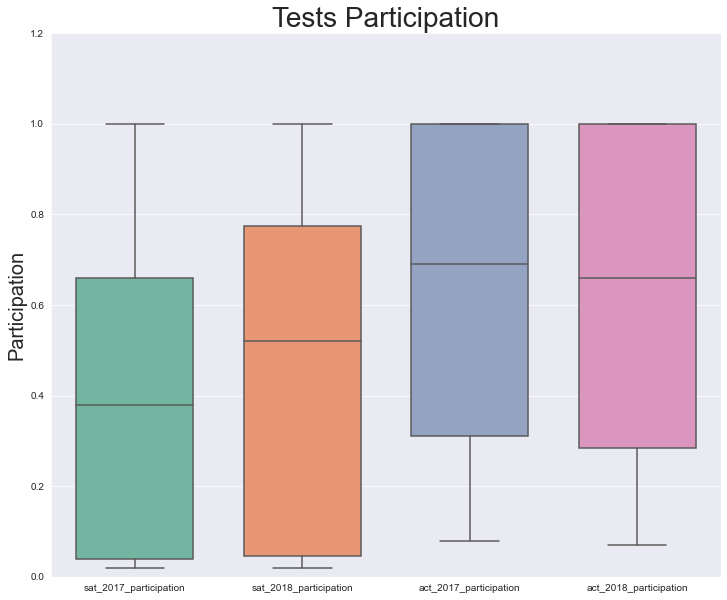

In [80]:
#Boxplot for Test participation rate
ax = plt.subplots(figsize=(12,10))

plt.title('Tests Participation',fontsize=28)
plt.ylabel('Participation',fontsize=20)
plt.ylim(0, 1.2)


sns.boxplot(data=final[['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']],width=0.7,palette="Set2")




#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Finding the changes in SAT participation

In [81]:
#Finding the changes in SAT participation
sat_participation_change = pd.DataFrame(final,columns=['sat_2018_participation','sat_2017_participation'])

sat_participation_change['diff'] = sat_participation_change['sat_2018_participation'] - sat_participation_change['sat_2017_participation']


#Showing the top 5 and bottom 5 states in one DataFrame

sat_participation_change.sort_values(['diff'],ascending=False).head(6).append(sat_participation_change.sort_values(['diff'],ascending=False).tail())

,sat_2018_participation,sat_2017_participation,diff
state,,,
Illinois,0.99,0.09,0.90
Colorado,1.00,0.11,0.89
Rhode Island,0.97,0.71,0.26
West Virginia,0.28,0.14,0.14
New Jersey,0.82,0.70,0.12
New York,0.79,0.67,0.12
Wyoming,0.03,0.03,0.00
Arizona,0.29,0.30,-0.01
Nevada,0.23,0.26,-0.03


#### Finding the changes in ACT participation

In [82]:
#Finding the changes in ACT participation
act_participation_change = pd.DataFrame(final,columns=['act_2018_participation','act_2017_participation'])

act_participation_change['diff'] = act_participation_change['act_2018_participation'] - act_participation_change['act_2017_participation']

#Showing the top 5 and bottom 5 states in one DataFrame
act_participation_change.sort_values(['diff'],ascending=False).head(6).append(act_participation_change.sort_values(['diff'],ascending=False).tail(6))

,act_2018_participation,act_2017_participation,diff
state,,,
Ohio,1.00,0.75,0.25
Nebraska,1.00,0.84,0.16
Arizona,0.66,0.62,0.04
Maryland,0.31,0.28,0.03
Oregon,0.42,0.40,0.02
Iowa,0.68,0.67,0.01
Rhode Island,0.15,0.21,-0.06
Florida,0.66,0.73,-0.07
Michigan,0.22,0.29,-0.07


Text(0.5, 0, '')

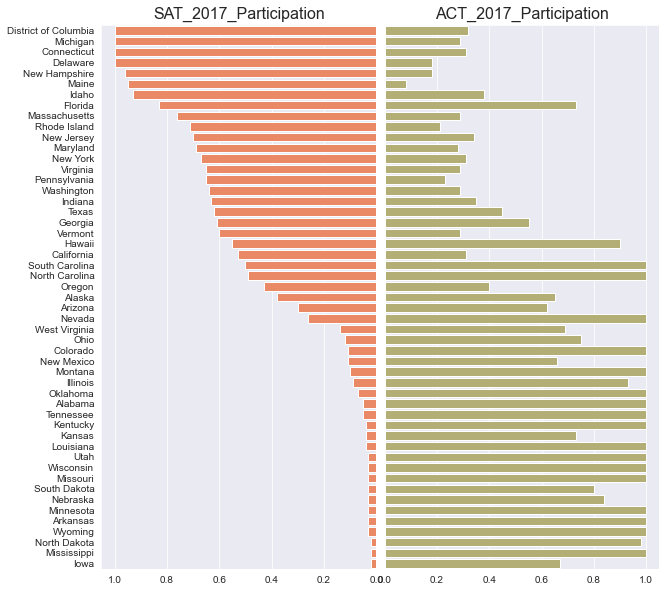

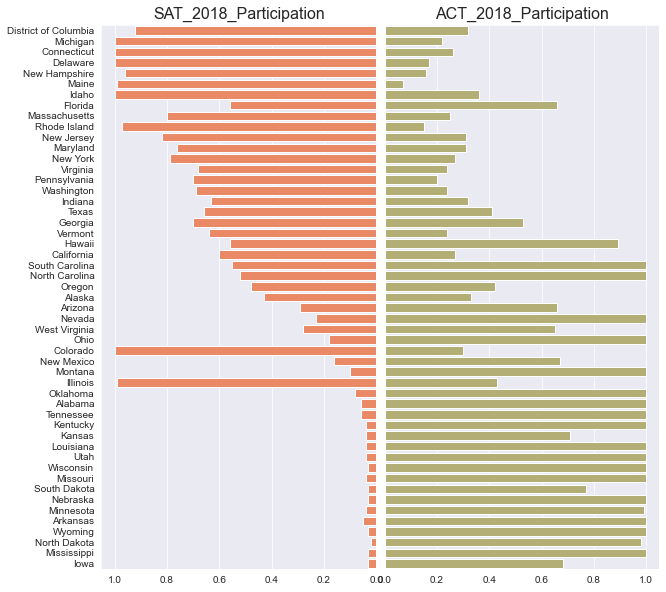

In [83]:
#Plots for SAT and ACT participation rates
fig, ax = plt.subplots(1,2,figsize=(10, 10),sharey=True) 
plt.subplots_adjust(wspace=0.03)

# SAT participation 2017
final = final.sort_values(by='sat_2017_participation',ascending=False)
sns.barplot(y=final.index.values, x='sat_2017_participation',data=final,color='coral',ax=ax[0])
ax[0].set_title('SAT_2017_Participation',fontsize=16)
ax[0].set_xlabel('')
ax[0].invert_xaxis()


# ACT participation 2017
sns.barplot(y=final.index.values, x='act_2017_participation',data=final,color='darkkhaki',ax=ax[1])
ax[1].set_title('ACT_2017_Participation',fontsize=16)
ax[1].set_xlabel('')

fig, ax = plt.subplots(1,2,figsize=(10, 10),sharey=True) 
plt.subplots_adjust(wspace=0.03)

# SAT participation 2018
sns.barplot(y=final.index.values, x='sat_2018_participation',data=final,color = "coral",ax=ax[0])
ax[0].set_title('SAT_2018_Participation',fontsize=16)
ax[0].set_xlabel('')
ax[0].invert_xaxis()

# ACT participation 2018

sns.barplot(y=final.index.values, x='act_2018_participation',data=final,color = "darkkhaki",ax=ax[1])
ax[1].set_title('ACT_2018_Participation',fontsize=16)
ax[1].set_xlabel('')


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [84]:
final.describe()

,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.


| Column Name  | Description |
| ------------- |:-------------:|
| sat_2017_participation | Distribution is positively skewed                                              |
| act_2017_participation | Distribution is negatively skewed with many states reaching 100% participation |
| sat_2018_participation | Distribution is positively skewed                                 |
| act_2018_participation | Distribution is negatively skewed with many states reaching 100% participation |
| sat_2017_ebrw          | Bimodal distribution with 2 peaks                                 |
| sat_2017_math          | Positively skewed with slightly symmetrical distribution          |
| sat_2017_total         | Non-symmetrical distribution with two peaks                       |
| act_2017_english       | Slightly normal distribution with evenly spread data              |
| act_2017_math          | Positively skewed with slightly symmetrical distribution          |
| act_2017_reading       | Non-symmetrical distribution                                      |
| act_2017_science       | Slightly Normal distribution                                      |
| act_2017_composite     | Slightly Normal distribution with mean and median close to center          |












In [85]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_ebrw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


In [86]:
final.mode()

,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
0,0.03,513.0,524.0,1005.0,1.0,19.0,19.4,20.1,20.5,19.8,0.03,513.0,506,1010.0,1.0,20.0,18.2,19.7,24.7,22.2
1,NaN,530.0,NaN,1052.0,NaN,19.5,NaN,20.8,20.6,20.3,0.04,547.0,530,1099.0,NaN,20.3,19.8,20.3,NaN,23.4
2,NaN,NaN,NaN,1116.0,NaN,21.2,NaN,NaN,20.9,21.4,NaN,633.0,547,1117.0,NaN,23.9,23.8,23.6,NaN,23.5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,618,1265.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.2,NaN,NaN,NaN,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### From these observations, we note the following:
   * Symmetric distributions are when mean = mode = median
   * Negative Skew is when mean < median < mode
   * Positive Skew is mode < median < mean
     
### Participation rates
#### SAT participation is positively skewed meaning that participation is - [low](#SAT-and-ACT-Participation-Rates)

   * Mean : 0.39, Median: 0.38, Mode: 0.03, mode < median < mean
    
#### ACT participation is negatively skewed meaning that participation is -[high](#SAT-and-ACT-Participation-Rates) with 100% in some states
   * Mean : 0.65, Median: 0.69, Mode: 1.0, mean < median < mode
   
### Subtest score    
#### SAT and ACT math scores are  - [ positively skewed ](#SAT-and-ACT-Math-scores)
   * SAT Math score: Mean: 556.88, Median: 548.0, Mode: 524, mean < median < mode
   * ACT Math score: Mean: 21.18, Median: 20.9, Mode: 19.4, mean < median < mode

#### SAT Reading/Writing, ACT Reading and ACT English scores are also - [positively skewed](#SAT-and-ACT-Reading-Scores)

#### ACT Science score is close to -[normal distribution](#SAT-and-ACT-English/Science-Scores)
   * ACT Science score: Mean: 21.45, Median: 21.3, Mode: 20.9,mean = median = mode
   
### Total/Composite score
#### SAT Total/Composite scores  is -[bimodal](#SAT-and-ACT-Composite-scores)
   * Mean:1126.09 ,Median:1107.00 , Mode: 1005.0,1116
   
#### ACT Total/Composite scores  is close to -[normal distribution](#SAT-and-ACT-Composite-scores)
   * Mean:21.51 ,Median:21.40 , Mode: 19.8, 21.3, mean = median = mode
 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

No. The data is not normally distributed. As the sample size is morethan 30, there is tendency for the data to be normally distributed. However some of the data still show positive skew.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

No. The assumption does not hold true for Math, Reading or Participation rates as all of these data are either positively or negatively skewed.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

No it would not as the data is aggregated into 51 data points. Not allowing for us to do random sampling and do statistical testing in a way that is meaningful. If we were to have all the data points that contributed to the overall State score would make more sense to conduct statistical inference.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Assuming the population is every test-taking individual, the samples in these datasets are not randomly drawn as they are grouped by state, and they also do not have the same sample size as the number of people taking the tests in each state is different. Furthermore, the SAT(200-800) and ACT(1-36) use very different scale of measurements and one would need to convert to equivalents before making any assumptions.



#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [87]:
#alpha = 0.05

# H0 (null hypothesis):         μ_SAT - μ_ACT = 0  
# HA (alternative hypothesis):  μ_SAT - μ_ACT ≠ 0

stats.ttest_ind(final['sat_2017_participation'], final['act_2017_participation'])

# p-value is 0.0002 while alpha is 0.05
# Because p < alpha, we reject the null hypothesis and conclude that the alternative hypothesis is true.

Ttest_indResult(statistic=-3.8085778908170576, pvalue=0.00024134203698662128)

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

From the tables - [above](#Finding-the-changes-in-SAT-participation) we could see that the Illinois, Colorado and Rhode Island saw significant increase in their SAT scores and reduction in their ACT - [scores](#Finding-the-changes-in-ACT-participation) from 2017 to 2018.Therefore these states are taken for further evaluation.


Illinois SAT participation rate increased from 9% to 99% and Colorado increased from 11% to 100%. Their ACT percentages reduced by almost 50% from 93% to 43% for Illinois and from 100% to 30% for Colorado. Whereas Rhode Island's SAT participation rate increased from 71% to 97% and ACT reduced from 21% to 15%.

**Illinois**

Illinois recently began offering the SAT to all juniors in public high schools. As a result, SAT usage in that state spiked by 90%. **[1](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/)**

**Colorado**

SAT usage also spiked in Colorado because of a contract with the College board which resulted in almost 89% spike in participation rate. SAT/PSAT are required tests for high school students in Colorado.
**[2](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)**

The Colorado state decided to switch from ACT to SAT in 2015.
The SAT test was better aligned with the high school Colorado Academic Standards.
The College Board (which administrates the SAT test) also provides more education resources for students.

**Rhode Island:**

Rhode Island saw an increase from 71% to 97 % in SAT participation rate. In 2018, the SATs and PSATs became a graduation requirement, part of the state’s federal education plan in Rhode Island. Rhode Island is one of the 10 states to give SAT to students for free.**[3](https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores)**

The SAT also recorded large gains in California, New York and Florida, although those states do not have similar statewide contracts.



## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The key takeaways are,

  - Participation rates and test scores are negatively correlated. 
  - High participation rate in one test means low participation in the other test.
  - SAT is popular among the coastal areas whereas ACT is popular in among inlands.
  - Test scores were similar for both 2017 and 2018 as well as the state that scored highest and lowest.

From these observations it is recommended that efforts need taken to increase participation rate of California. California had 7% increase in SAT participation rate and 4% decrease in ACT participation. However increasing the participation rate will likely to reduce the average score because of the following reasons:

   - While California was not among the lowest participation rates, it is still below the 50%th percentile in both 2017 and 2018.
   - California does not have any mandatory testing. It's one of first state to offer a choice of three tests.
   - Being a highly populous country, it also requires lot of effort to increase the overall SAT participation rate.
    Efforts to increase SAT participation rates should be done on California as it does not have any mandatory tests and  can also implement few more readily available free resources to encourage students by SAT coach tools.
    
Additional data that would have been helpful:

   - Participation rates by cities/schools
   - SAT and ACT data for 5-8 years.
   - College admission reqirements for each state/city.
    



    
    